In [1]:
#import all the required libraries 
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
#loading the csv file from the location or folder
file_tr=r'C:\Users\Pavan\Documents\pet_data_set\train.csv'
file_test=r'C:\Users\Pavan\Documents\pet_data_set\test.csv'


In [3]:
#reading the file 
train=pd.read_csv(file_tr)
test=pd.read_csv(file_test)


In [4]:
#train data
train

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,ANSL_69903,10-07-2016 00:00,21-09-2016 16:25,2.0,Brown Tabby,0.80,7.78,13,9,0,1
1,ANSL_66892,21-11-2013 00:00,27-12-2018 17:47,1.0,White,0.72,14.19,13,9,0,2
2,ANSL_69750,28-09-2014 00:00,19-10-2016 08:24,NaN,Brown,0.15,40.90,15,4,2,4
3,ANSL_71623,31-12-2016 00:00,25-01-2019 18:30,1.0,White,0.62,17.82,0,1,0,2
4,ANSL_57969,28-09-2017 00:00,19-11-2017 09:38,2.0,Black,0.50,11.06,18,4,0,1
...,...,...,...,...,...,...,...,...,...,...,...
18829,ANSL_51738,26-01-2017 00:00,09-03-2018 15:35,2.0,Tricolor,0.44,27.36,0,1,0,2
18830,ANSL_59900,18-06-2016 00:00,09-07-2017 08:37,NaN,Brown,0.73,14.25,15,4,2,4
18831,ANSL_53210,21-07-2010 00:00,22-08-2018 14:27,0.0,Calico Point,0.99,28.13,13,9,1,1
18832,ANSL_63468,12-05-2017 00:00,08-02-2018 14:05,0.0,Tan,0.55,44.82,13,9,1,2


In [5]:
#test data
test

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2
0,ANSL_75005,2005-08-17 00:00:00,2017-09-07 15:35:00,0.0,Black,0.87,42.73,0,7
1,ANSL_76663,2018-11-15 00:00:00,2019-05-08 17:24:00,1.0,Orange Tabby,0.06,6.71,0,1
2,ANSL_58259,2012-10-11 00:00:00,2018-04-02 16:51:00,1.0,Black,0.24,41.21,0,7
3,ANSL_67171,2015-02-13 00:00:00,2018-04-06 07:25:00,1.0,Black,0.29,8.46,7,1
4,ANSL_72871,2017-01-18 00:00:00,2018-04-26 13:42:00,1.0,Brown,0.71,30.92,0,7
...,...,...,...,...,...,...,...,...,...
8067,ANSL_66809,2016-02-10 00:00:00,2017-03-10 14:56:00,2.0,Brown,0.82,36.08,13,9
8068,ANSL_59041,2015-12-07 00:00:00,2018-02-12 00:00:00,0.0,Tan,0.49,27.54,13,9
8069,ANSL_60034,2015-12-08 00:00:00,2017-01-04 17:19:00,0.0,Black,0.98,37.19,0,7
8070,ANSL_58066,2016-06-28 00:00:00,2017-07-20 18:19:00,NaN,Black,0.79,23.83,0,2


In [6]:
#droping the traget variable from the train data
train.drop(["breed_category","pet_category"], axis=1)


,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2
0,ANSL_69903,10-07-2016 00:00,21-09-2016 16:25,2.0,Brown Tabby,0.80,7.78,13,9
1,ANSL_66892,21-11-2013 00:00,27-12-2018 17:47,1.0,White,0.72,14.19,13,9
2,ANSL_69750,28-09-2014 00:00,19-10-2016 08:24,NaN,Brown,0.15,40.90,15,4
3,ANSL_71623,31-12-2016 00:00,25-01-2019 18:30,1.0,White,0.62,17.82,0,1
4,ANSL_57969,28-09-2017 00:00,19-11-2017 09:38,2.0,Black,0.50,11.06,18,4
...,...,...,...,...,...,...,...,...,...
18829,ANSL_51738,26-01-2017 00:00,09-03-2018 15:35,2.0,Tricolor,0.44,27.36,0,1
18830,ANSL_59900,18-06-2016 00:00,09-07-2017 08:37,NaN,Brown,0.73,14.25,15,4
18831,ANSL_53210,21-07-2010 00:00,22-08-2018 14:27,0.0,Calico Point,0.99,28.13,13,9
18832,ANSL_63468,12-05-2017 00:00,08-02-2018 14:05,0.0,Tan,0.55,44.82,13,9


In [7]:
#pd.to_datatime will give the yyyy/mm/dd hh:mm:ss format
train["issue_date"]=pd.to_datetime(train["issue_date"])
train['listing_date']=pd.to_datetime(train['listing_date'])
train["issue_date"]

0       2016-10-07
1       2013-11-21
2       2014-09-28
3       2016-12-31
4       2017-09-28
           ...    
18829   2017-01-26
18830   2016-06-18
18831   2010-07-21
18832   2017-12-05
18833   2011-12-13
Name: issue_date, Length: 18834, dtype: datetime64[ns]

In [8]:
train['listing_date'].head()

0   2016-09-21 16:25:00
1   2018-12-27 17:47:00
2   2016-10-19 08:24:00
3   2019-01-25 18:30:00
4   2017-11-19 09:38:00
Name: listing_date, dtype: datetime64[ns]

In [9]:
test["issue_date"]=pd.to_datetime(test.issue_date)
test["listing_date"]=pd.to_datetime(test.listing_date)
test["listing_date"].head()

0   2017-09-07 15:35:00
1   2019-05-08 17:24:00
2   2018-04-02 16:51:00
3   2018-04-06 07:25:00
4   2018-04-26 13:42:00
Name: listing_date, dtype: datetime64[ns]

In [10]:
#1 concating the train and test after droping the target variables
#2 applying the pd.to_datetime to the date related columns
#3 sepracting the issue_date from the listing_date in order to get the duration
dataset=pd.concat([train.drop(["breed_category","pet_category"],axis=1),test])
dataset['issue_date']=pd.to_datetime(dataset["issue_date"])
dataset["listing_date"] = pd.to_datetime(dataset["listing_date"])
dataset['duration']=(dataset["listing_date"]-dataset['issue_date']).dt.days
dataset=dataset.drop(["pet_id","issue_date","listing_date"],axis=1)
dataset

,condition,color_type,length(m),height(cm),X1,X2,duration
0,2.0,Brown Tabby,0.80,7.78,13,9,-16
1,1.0,White,0.72,14.19,13,9,1862
2,NaN,Brown,0.15,40.90,15,4,752
3,1.0,White,0.62,17.82,0,1,755
4,2.0,Black,0.50,11.06,18,4,52
...,...,...,...,...,...,...,...
8067,2.0,Brown,0.82,36.08,13,9,394
8068,0.0,Tan,0.49,27.54,13,9,798
8069,0.0,Black,0.98,37.19,0,7,393
8070,NaN,Black,0.79,23.83,0,2,387


In [11]:
#here we creating the info dataset with help of qurdents of the three variables which gives the information of the three columns 
info = pd.DataFrame()
info['length(m)'] = [np.percentile(dataset['length(m)'],25*i) for i in range(1,4)]
info['height(cm)'] = [np.percentile(dataset['height(cm)'],25*i) for i in range(1,4)]
info['duration'] = [np.percentile(dataset['duration'],25*i) for i in range(1,4)]
info



,length(m),height(cm),duration
0,0.25,16.21,143.0
1,0.50,27.36,402.0
2,0.76,38.78,1083.0


In [12]:
#here we creating two more rows for treating the outliers 
#for low outliers Q1 - 1.5 (IQR)Q3 + 1.5 IQR
#Q1 - 1.5 (Q3-Q1) or Q3 + 1.5 (Q3-Q1)
#2.5 Q1 - 1.5 Q3 or 2.5 Q3 - 1.5 Q1
info.loc[3]=[2.5*info.loc[0,column]-1.5*info.loc[2,column] for column in info.columns]
info.loc[4]=[2.5*info.loc[2,column]-1.5*info.loc[0,column] for column in info.columns]
info

,length(m),height(cm),duration
0,0.250,16.210,143.0
1,0.500,27.360,402.0
2,0.760,38.780,1083.0
3,-0.515,-17.645,-1267.0
4,1.525,72.635,2493.0


In [13]:
#creating a function to alloting the values which are in specific range
def range_part(column,value):
    if value > info.loc[4,column]:
        return 5
    elif value > info.loc[2,column]:
        return 4
    elif value > info.loc[1,column]:
        return 3
    elif value > info.loc[0,column]:
        return 2
    elif value > info.loc[3,column]:
        return 1
    else:
        return 0

In [14]:
#datatype of variables
dataset.dtypes

condition     float64
color_type     object
length(m)     float64
height(cm)    float64
X1              int64
X2              int64
duration        int64
dtype: object

In [15]:
#creating a list with non object datatypes
numerical = dataset.dtypes[dataset.dtypes != object].index
numerical

Index(['condition', 'length(m)', 'height(cm)', 'X1', 'X2', 'duration'], dtype='object')

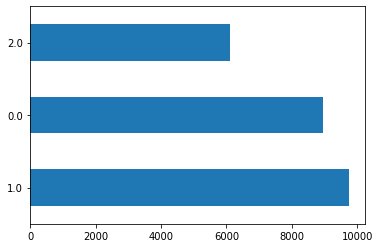

In [16]:
#ploting the condition variable
dataset['condition'].value_counts().plot(kind='barh')

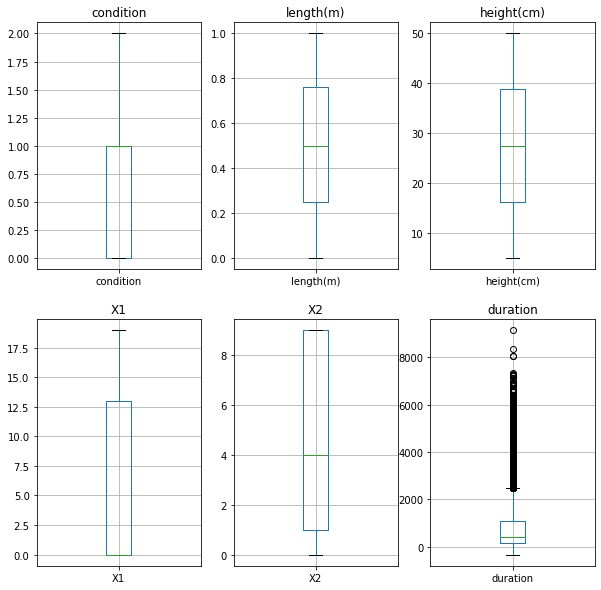

In [17]:
#creating the boxplots with non object datatypes

import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,3,figsize=(10,10))

for i in range(3):
    dataset.boxplot(column=list(numerical)[i], ax=ax[0,i])
    ax[0,i].title.set_text(numerical[i])

for i in range(3):
    dataset.boxplot(column=list(numerical)[i+3], ax=ax[1,i])
    ax[1,i].title.set_text(numerical[3+i])

In [18]:
#tqdm is a library used for iteration and creating progress bar
#in the progress bar we replace the values with help of lambda and function(range_part)
from tqdm import tqdm
tqdm.pandas()
dataset['length_range'] = dataset['length(m)'].progress_apply(lambda x:range_part('length(m)',x))
dataset['height_range'] = dataset['height(cm)'].progress_apply(lambda x:range_part('height(cm)',x))
dataset['duration_range'] = dataset['duration'].progress_apply(lambda x:range_part('duration',x))
dataset

C:\ProgramData\Anaconda3\lib\site-packages\tqdm\std.py:648: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
100%|██████████| 26906/26906 [00:01<00:00, 21129.41it/s]


,condition,color_type,length(m),height(cm),X1,X2,duration,length_range,height_range,duration_range
0,2.0,Brown Tabby,0.80,7.78,13,9,-16,4,1,1
1,1.0,White,0.72,14.19,13,9,1862,3,1,4
2,NaN,Brown,0.15,40.90,15,4,752,1,4,3
3,1.0,White,0.62,17.82,0,1,755,3,2,3
4,2.0,Black,0.50,11.06,18,4,52,2,1,1
...,...,...,...,...,...,...,...,...,...,...
8067,2.0,Brown,0.82,36.08,13,9,394,4,3,2
8068,0.0,Tan,0.49,27.54,13,9,798,2,3,3
8069,0.0,Black,0.98,37.19,0,7,393,4,3,2
8070,NaN,Black,0.79,23.83,0,2,387,4,2,2


In [19]:
#importing labelencodeer form sklearn library
#labelencoder converts categorical values into numeric form according to thier alphabet order 

from sklearn.preprocessing import LabelEncoder
dataset['color_number'] = LabelEncoder().fit_transform(dataset['color_type'])
dataset = dataset[['condition','length_range','height_range','duration_range','color_number','X1','X2']].fillna(-1)
dataset

,condition,length_range,height_range,duration_range,color_number,X1,X2
0,2.0,4,1,1,18,13,9
1,1.0,3,1,4,53,13,9
2,-1.0,1,4,3,15,15,4
3,1.0,3,2,3,53,0,1
4,2.0,2,1,1,2,18,4
...,...,...,...,...,...,...,...
8067,2.0,4,3,2,15,13,9
8068,0.0,2,3,3,48,13,9
8069,0.0,4,3,2,2,0,7
8070,-1.0,4,2,2,2,0,2


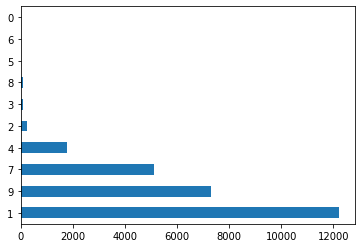

In [20]:
dataset['X2'].value_counts().plot(kind='barh')

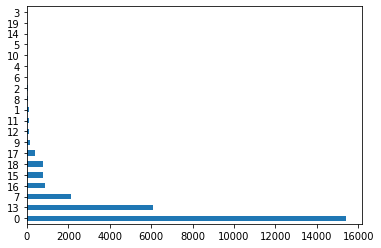

In [21]:
dataset['X1'].value_counts().plot(kind='barh')

In [22]:
#importing train_test_split from sklearn.model_selction
from sklearn.model_selection import train_test_split
x_tr,x_ts,y_tr,y_ts,z_tr,z_ts=train_test_split(dataset.iloc[:len(train)],train["breed_category"],train["pet_category"],test_size=0.3)

In [23]:
#logistic regression
from sklearn.linear_model import LogisticRegression
X_test = dataset.iloc[len(train):]
LR_b = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(x_tr, y_tr)
y_pr = LR_b.predict(x_ts)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [24]:
#importing cm and cr to check measurment of performance of the algorithm
from sklearn.metrics import confusion_matrix , classification_report
cm=confusion_matrix(y_ts,y_pr)
cr=(classification_report(y_ts,y_pr))

In [25]:
cm

array([[2334,  354,    0],
       [ 618, 1890,    0],
       [   0,    1,  454]], dtype=int64)

In [26]:
cr

'              precision    recall  f1-score   support\n\n           0       0.79      0.87      0.83      2688\n           1       0.84      0.75      0.80      2508\n           2       1.00      1.00      1.00       455\n\n    accuracy                           0.83      5651\n   macro avg       0.88      0.87      0.87      5651\nweighted avg       0.83      0.83      0.83      5651\n'

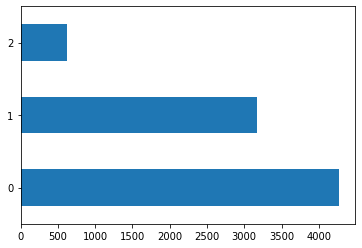

In [27]:
Y_LR = LR_b.predict(X_test)
pd.DataFrame(Y_LR, columns=['Value'])['Value'].value_counts().plot(kind='barh')

In [28]:
#Svm
from sklearn.svm import SVC
SVM_b = SVC(decision_function_shape="ovo").fit(x_tr, y_tr)
y_svc = SVM_b.predict(x_ts)
cm=confusion_matrix(y_ts,y_svc)
cr=(classification_report(y_ts,y_svc))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [29]:
cm

array([[2579,  109,    0],
       [ 516, 1982,   10],
       [   0,   28,  427]], dtype=int64)

In [30]:
cr

'              precision    recall  f1-score   support\n\n           0       0.83      0.96      0.89      2688\n           1       0.94      0.79      0.86      2508\n           2       0.98      0.94      0.96       455\n\n    accuracy                           0.88      5651\n   macro avg       0.92      0.90      0.90      5651\nweighted avg       0.89      0.88      0.88      5651\n'

In [31]:
X_test

,condition,length_range,height_range,duration_range,color_number,X1,X2
0,0.0,4,4,5,2,0,7
1,1.0,1,1,2,38,0,1
2,1.0,1,4,4,2,0,7
3,1.0,2,1,4,2,7,1
4,1.0,3,3,3,15,0,7
...,...,...,...,...,...,...,...
8067,2.0,4,3,2,15,13,9
8068,0.0,2,3,3,48,13,9
8069,0.0,4,3,2,2,0,7
8070,-1.0,4,2,2,2,0,2


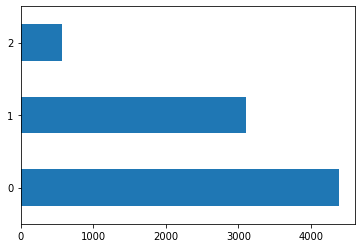

In [32]:
y_SVC=SVM_b.predict(X_test)
pd.DataFrame(y_SVC, columns=['Value'])['Value'].value_counts().plot(kind='barh')

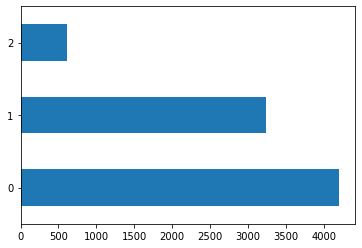

In [33]:
from sklearn.ensemble import RandomForestClassifier
RF_b = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0).fit(x_tr, y_tr)
y_rf = RF_b.predict(x_ts)
y_RF=RF_b.predict(X_test)
pd.DataFrame(y_RF, columns=['Value'])['Value'].value_counts().plot(kind='barh')

In [34]:
cm=confusion_matrix(y_ts,y_rf)
cm

array([[2514,  174,    0],
       [ 400, 2108,    0],
       [   0,    0,  455]], dtype=int64)

In [35]:
cr=classification_report(y_ts,y_rf)
cr

'              precision    recall  f1-score   support\n\n           0       0.86      0.94      0.90      2688\n           1       0.92      0.84      0.88      2508\n           2       1.00      1.00      1.00       455\n\n    accuracy                           0.90      5651\n   macro avg       0.93      0.93      0.93      5651\nweighted avg       0.90      0.90      0.90      5651\n'

In [36]:
from sklearn.neural_network import MLPClassifier
NN_b = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(150, 10), random_state=1).fit(x_tr, y_tr)
y_nn = NN_b.predict(x_ts)


In [37]:
cm=confusion_matrix(y_ts,y_nn)
cr=classification_report(y_ts,y_nn)

In [38]:
cm

array([[2429,  259,    0],
       [ 348, 2160,    0],
       [   0,    0,  455]], dtype=int64)

In [39]:
cr

'              precision    recall  f1-score   support\n\n           0       0.87      0.90      0.89      2688\n           1       0.89      0.86      0.88      2508\n           2       1.00      1.00      1.00       455\n\n    accuracy                           0.89      5651\n   macro avg       0.92      0.92      0.92      5651\nweighted avg       0.89      0.89      0.89      5651\n'

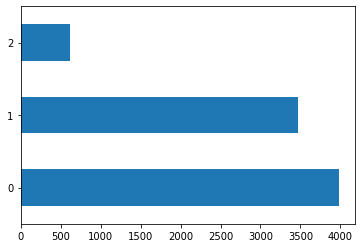

In [40]:
y_NN= NN_b.predict(X_test)
pd.DataFrame(y_NN, columns=['Value'])['Value'].value_counts().plot(kind='barh')

In [41]:
#predictio of pet_category using the logistic_regression
from sklearn.linear_model import LogisticRegression
X_test = dataset.iloc[len(train):]
LR_P = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(x_tr, z_tr)
z_lr = LR_P.predict(x_ts)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [42]:
cm=confusion_matrix(z_ts,z_lr)
cr=(classification_report(z_ts,z_lr))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [43]:
cm

array([[   0,    5,   17,    7],
       [   0, 1274,  853,   25],
       [   0,  580, 2581,    8],
       [   0,   41,   67,  193]], dtype=int64)

In [44]:
cr



'              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00        29\n           1       0.67      0.59      0.63      2152\n           2       0.73      0.81      0.77      3169\n           4       0.83      0.64      0.72       301\n\n    accuracy                           0.72      5651\n   macro avg       0.56      0.51      0.53      5651\nweighted avg       0.71      0.72      0.71      5651\n'

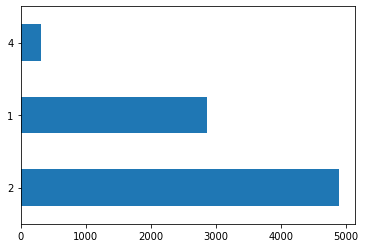

In [45]:
z_LR=LR_P.predict(X_test)
pd.DataFrame(z_LR,columns=["value"])["value"].value_counts().plot(kind="barh")

In [46]:
SVM_P = SVC(decision_function_shape="ovo").fit(x_tr, z_tr)
z_svc = SVM_P.predict(x_ts)
cm=confusion_matrix(z_ts,z_svc)
cr=(classification_report(z_ts,z_svc))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [47]:
cm

array([[   1,    1,   20,    7],
       [   0, 1661,  484,    7],
       [   1,  160, 3003,    5],
       [   0,   24,   62,  215]], dtype=int64)

In [48]:
cr

'              precision    recall  f1-score   support\n\n           0       0.50      0.03      0.06        29\n           1       0.90      0.77      0.83      2152\n           2       0.84      0.95      0.89      3169\n           4       0.92      0.71      0.80       301\n\n    accuracy                           0.86      5651\n   macro avg       0.79      0.62      0.65      5651\nweighted avg       0.87      0.86      0.86      5651\n'

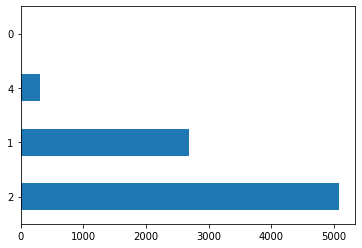

In [49]:
z_SVC=SVM_P.predict(X_test)
pd.DataFrame(z_SVC, columns=['Value'])['Value'].value_counts().plot(kind='barh')

In [50]:
RF_P = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0).fit(x_tr, z_tr)
z_rf = RF_P.predict(x_ts)
cm=confusion_matrix(z_ts,z_rf)
cr=classification_report(z_ts,z_rf)

In [51]:
cm

array([[   5,    0,   15,    9],
       [   0, 1647,  498,    7],
       [   1,  227, 2937,    4],
       [   2,   25,   44,  230]], dtype=int64)

In [52]:
cr

'              precision    recall  f1-score   support\n\n           0       0.62      0.17      0.27        29\n           1       0.87      0.77      0.81      2152\n           2       0.84      0.93      0.88      3169\n           4       0.92      0.76      0.83       301\n\n    accuracy                           0.85      5651\n   macro avg       0.81      0.66      0.70      5651\nweighted avg       0.85      0.85      0.85      5651\n'

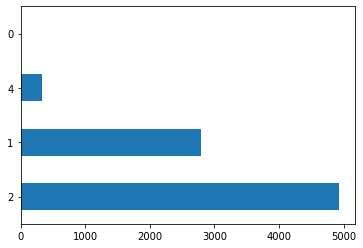

In [53]:
z_RF=RF_P.predict(X_test)
pd.DataFrame(z_RF, columns=['Value'])['Value'].value_counts().plot(kind='barh')

In [54]:

NN_P = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(150, 10), random_state=1).fit(x_tr, z_tr)
z_nn = NN_P.predict(x_ts)
cm=confusion_matrix(z_ts,z_nn)
cr=classification_report(z_ts,z_nn)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [55]:
cm

array([[   0,    9,   16,    4],
       [   0, 1282,  846,   24],
       [   0,  391, 2772,    6],
       [   0,   48,   62,  191]], dtype=int64)

In [56]:
cr

'              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00        29\n           1       0.74      0.60      0.66      2152\n           2       0.75      0.87      0.81      3169\n           4       0.85      0.63      0.73       301\n\n    accuracy                           0.75      5651\n   macro avg       0.58      0.53      0.55      5651\nweighted avg       0.75      0.75      0.74      5651\n'

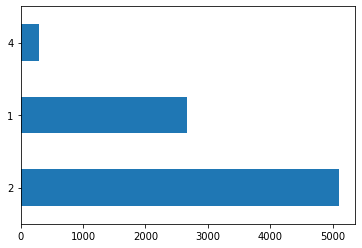

In [57]:
z_NN=NN_P.predict(X_test)
pd.DataFrame(z_NN,columns=['value'])['value'].value_counts().plot(kind="barh")

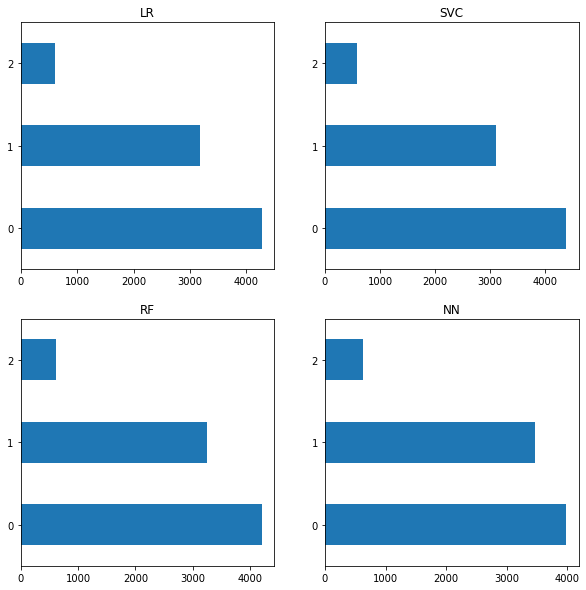

In [58]:
#ploting all four results of breed category
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,2,figsize=(10,10))

title = ['LR', 'SVC', 'RF','NN']
y_value = [Y_LR, y_SVC, y_RF,y_NN]
z_value = [z_LR, z_SVC, z_RF,z_NN]

for i in range(2):
    pd.DataFrame(y_value[i], columns=['Value'])['Value'].value_counts().plot(kind='barh', ax=ax[0,i])
    ax[0,i].title.set_text(title[i])

for i in range(2):
    pd.DataFrame(y_value[2+i], columns=['Value'])['Value'].value_counts().plot(kind='barh', ax=ax[1,i])
    ax[1,i].title.set_text(title[2+i])

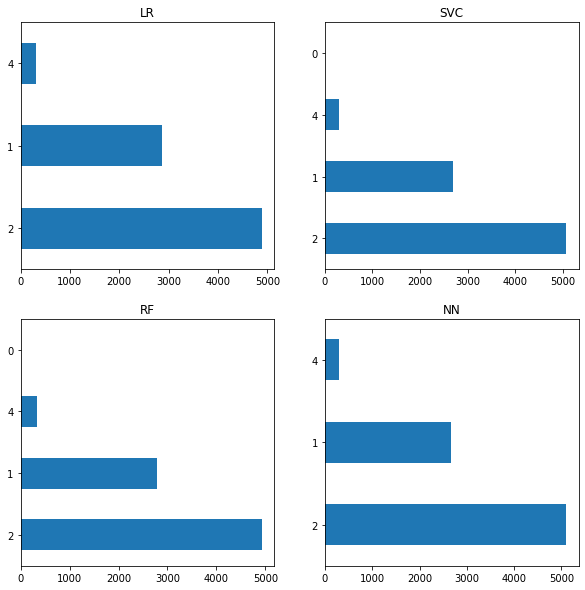

In [59]:
#ploting the all four results of pet_category
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,2,figsize=(10,10))

title = ['LR', 'SVC', 'RF','NN']
y_value = [Y_LR, y_SVC, y_RF,y_NN]
z_value = [z_LR, z_SVC, z_RF,z_NN]

for i in range(2):
    pd.DataFrame(z_value[i], columns=['Value'])['Value'].value_counts().plot(kind='barh', ax=ax[0,i])
    ax[0,i].title.set_text(title[i])

for i in range(2):
    pd.DataFrame(z_value[2+i], columns=['Value'])['Value'].value_counts().plot(kind='barh', ax=ax[1,i])
    ax[1,i].title.set_text(title[2+i])

In [60]:

from sklearn.externals import joblib
joblib.dump(RF_b, 'Breed_Classification.ml')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['Breed_Classification.ml']

In [61]:
joblib.dump(RF_P, 'Pet_Classification.ml')

['Pet_Classification.ml']

In [62]:
from sklearn.externals import joblib
model_1= joblib.load('Breed_Classification.ml')
model_1.predict([[2.0,4,1,1,18,13,9]])


array([1], dtype=int64)

In [63]:
model_2=joblib.load('Pet_Classification.ml')
model_2.predict([[2.0,4,1,1,18,13,9]])

array([1], dtype=int64)